In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

# Histogram Equalization

$$G_{new} = \frac{\# Pixels \: with \: gray \: scale \: level \: \ge \: G}{Total \: pixels} (Max \:  gray \: scale \: level)$$

Text(0, 0.5, 'Number of Pixels')

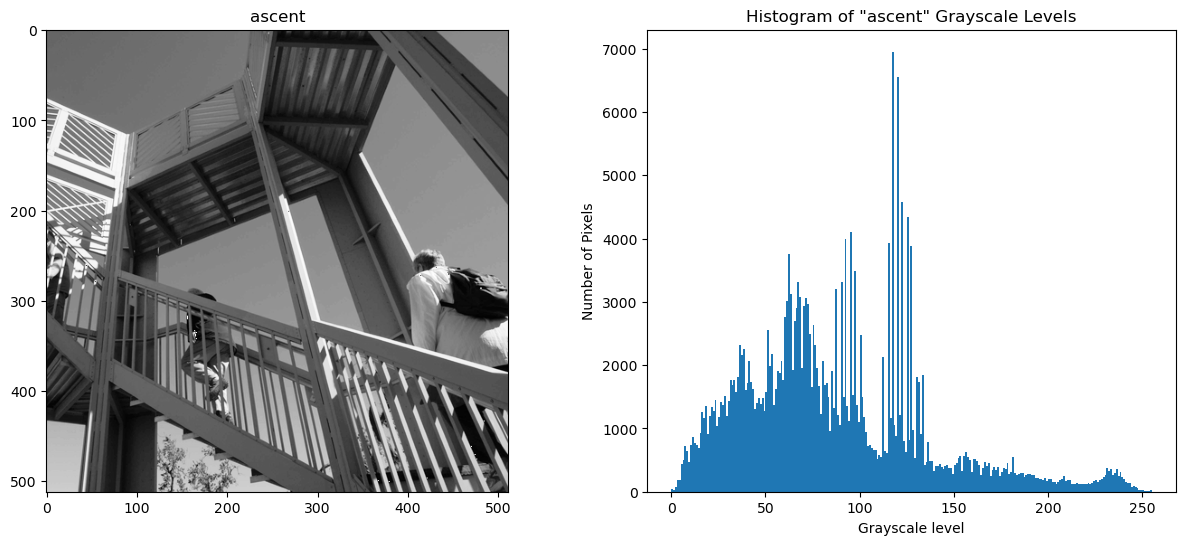

In [53]:
import scipy.datasets
ascent = scipy.datasets.ascent()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(ascent, cmap = 'Greys_r')
ax[0].set_title('ascent')

ax[1].hist(ascent.ravel(), bins = 255)
ax[1].set_title('Histogram of "ascent" Grayscale Levels')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

In [47]:
def histequal(img):
    '''img should be an image in the form of an np.array'''

    # make new 2D array based on size of original image, assuming original image is rectangular
    w, h = len(img[0]), len(img)
    equalized = [[0 for x in range(w)] for y in range(h)]
    equalized = np.array(equalized)

    equalhist, bins = np.histogram(img.ravel(), bins = 255) # take histogram data of img grayscale levels

    totalpx = w*h # total number of pixels
    peak = np.max(img) # peak gray scale value in original image

    for i in range(h):
        for ii in range(w):
            # each pixel value is recalculated based on the peak brightness, total number of pixels, and the number of pixels as dark as or darker than the original pixel value.
            equalized[i, ii] = sum(equalhist[:img[i, ii]+1])*peak/totalpx
    return equalized

Text(0, 0.5, 'Output Gray Scale level')

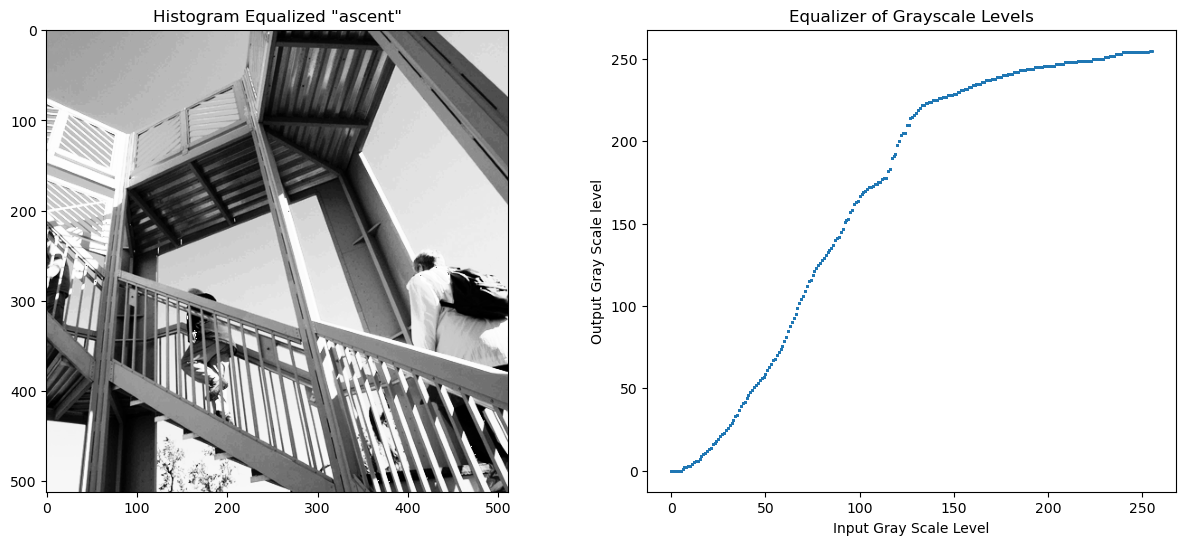

In [55]:
equalascent = histequal(ascent)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(equalascent, cmap = 'Greys_r')
ax[0].set_title('Histogram Equalized "ascent"')


ax[1].scatter(x = ascent.ravel(), y = equalascent.ravel(), s = 0.2)
ax[1].set_title('Equalizer of Grayscale Levels')
ax[1].set_xlabel('Input Gray Scale Level')
ax[1].set_ylabel('Output Gray Scale level')

# Convolution (Correlation) to Find a Pattern

In [73]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Text(0, 0.5, 'Number of Pixels')

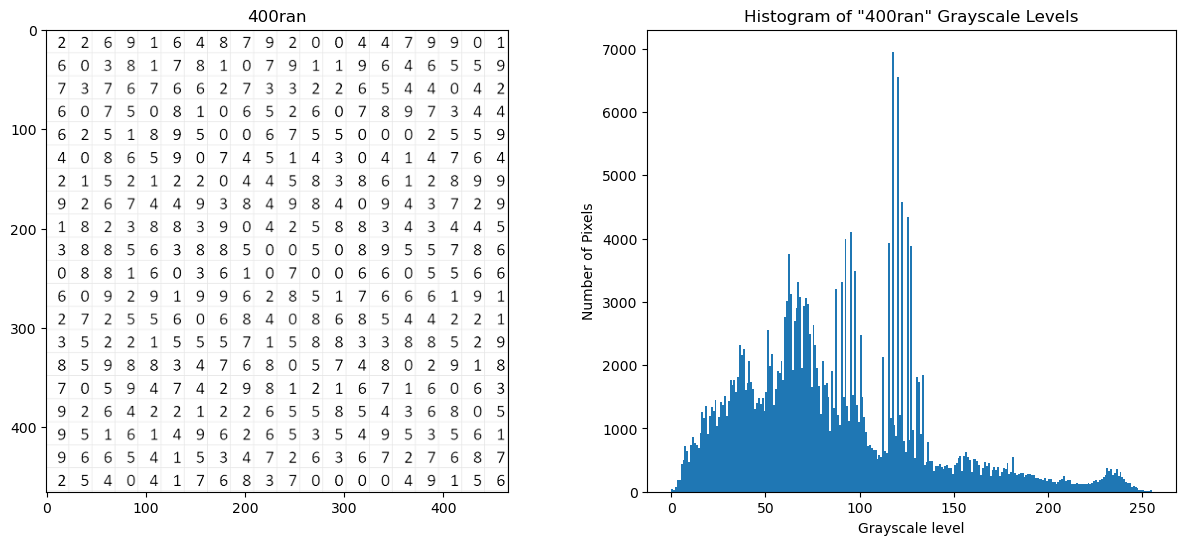

In [127]:
find2 = mpimg.imread("Data/Lab8 and WS 9 Images-20230302/400ran.png")
find2 = np.floor(rgb2gray(find2)*128+0.5)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(find2, cmap = 'Greys_r')
ax[0].set_title('400ran')

ax[1].hist(ascent.ravel(), bins = 255)
ax[1].set_title('Histogram of "400ran" Grayscale Levels')
ax[1].set_xlabel('Grayscale level')
ax[1].set_ylabel('Number of Pixels')

In [121]:
two = np.copy(find2[5:19, 11:21])
two -= two.mean()

In [122]:
twocorr = signal.correlate2d(find2,two,boundary='symm', mode='same')

Text(0.5, 1.0, 'Correlation image between cropped "2" and 400ran.png')

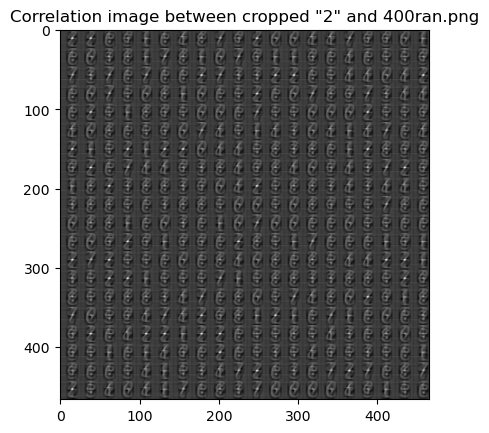

In [123]:
plt.imshow(twocorr, cmap = 'Greys_r')
plt.title('Correlation image between cropped "2" and 400ran.png')

Text(0.5, 1.0, 'Histogram of Correlation between cropped "2" and 400ran.png')

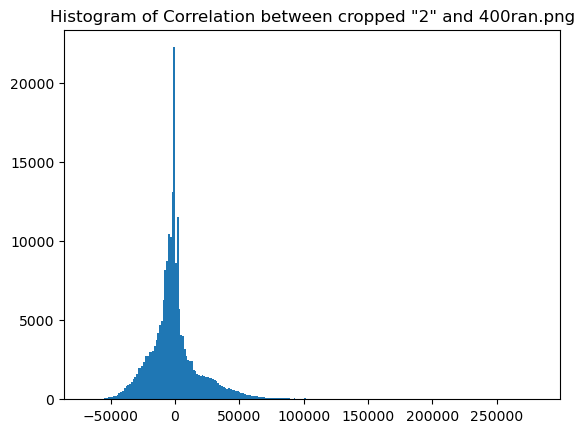

In [124]:
plt.hist(twocorr.ravel(), bins = 255)
plt.title('Histogram of Correlation between cropped "2" and 400ran.png')

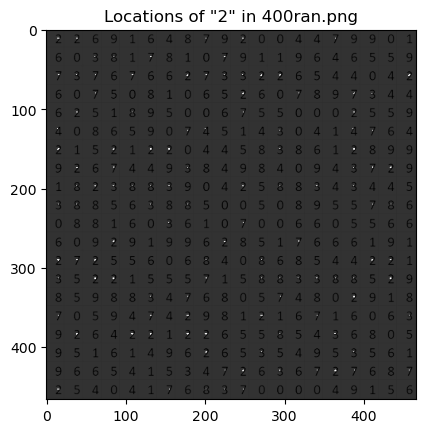

In [126]:
twocorrflat = twocorr.ravel()
twocorrpeak = np.array([255 if px > 140000 else 0 for px in twocorrflat])
twocorrpeak = twocorrpeak.reshape((466,466))
plt.imshow(twocorrpeak, cmap = 'Greys_r')
plt.title('Locations of "2" in 400ran.png')
plt.imshow(find2, cmap = 'Greys_r', alpha = 0.2)

# Dice Image

Text(0.5, 1.0, 'Avocados')

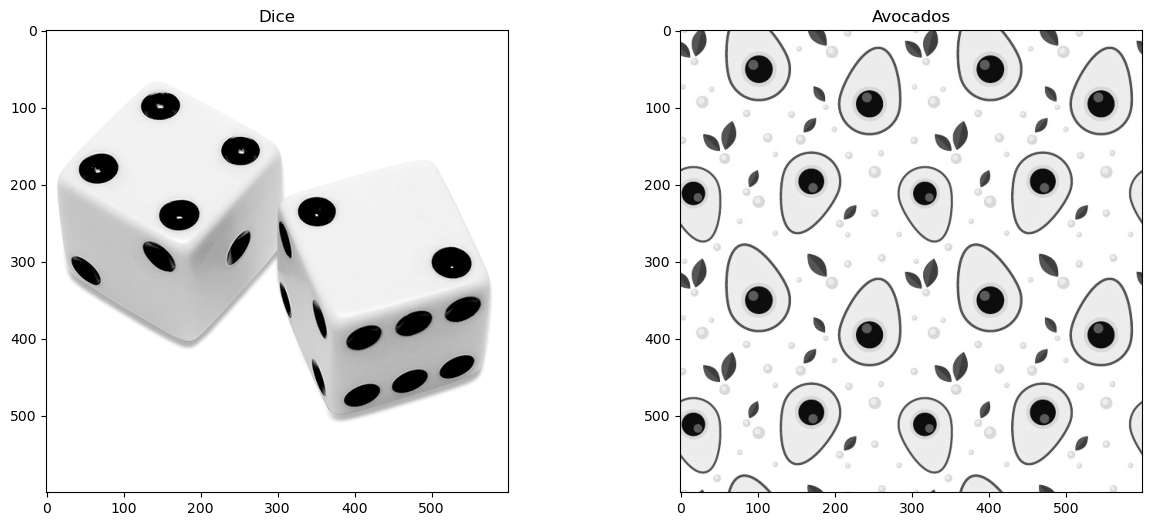

In [128]:
dice = mpimg.imread("Data/Lab8 and WS 9 Images-20230302/dice_gray.png")
dice = np.floor(rgb2gray(dice)*128+0.5)

avocado = mpimg.imread("Data/Lab8 and WS 9 Images-20230302/avocado_gray.png")
avocado = np.floor(rgb2gray(avocado)*128+0.5)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

ax[0].imshow(dice, cmap = 'Greys_r')
ax[0].set_title('Dice')

ax[1].imshow(avocado, cmap = 'Greys_r')
ax[1].set_title('Avocados')


Text(0, 0.5, 'Pixel count')

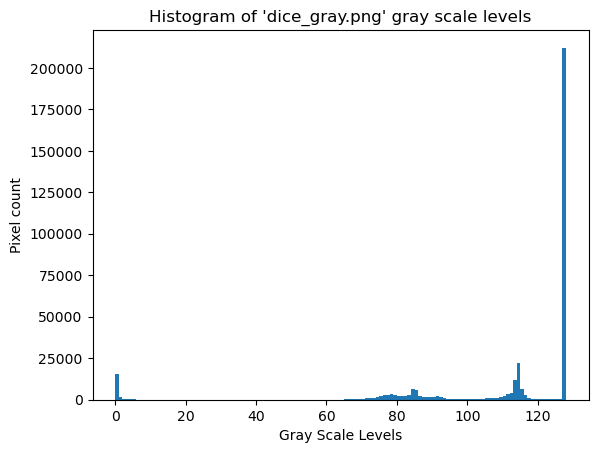

In [154]:
plt.hist(dice.ravel(), bins = 128)
plt.title("Histogram of 'dice_gray.png' gray scale levels")
plt.xlabel('Gray Scale Levels')
plt.ylabel('Pixel count')

Text(0.5, 1.0, "Dice a l'Avocado")

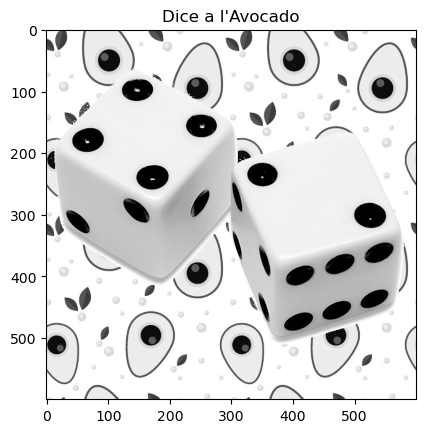

In [152]:
for i in range(len(dice)):
    for ii in range(len(dice[0])):
        if dice[i, ii] < 128:
            avocado[i, ii] = dice[i, ii]


plt.imshow(avocado, cmap = 'Greys_r')
plt.title("Dice a l'Avocado")